https://medium.com/@juee_thete/understanding-monte-carlo-simulation-and-its-implementation-with-python-3ecacb958cd4

This code is based on the above link

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def coin_flip():
    return np.random.randint(0,2)

In [5]:
coin_flip()

0

In [15]:
# monte carlo simulation
list1 = []
def monte_carlo(n):
    results = 0
    for i in range(n):
        flip_result = coin_flip()
        results =  results + flip_result
        # calculating probabilities values
        prob_value =  results/(i+1)
        list1.append(prob_value)
        # plot the result
        plt.axhline(y=0.5, color='red', linestyle='-')
        plt.xlabel('iteration')
        plt.ylabel('probability')
        plt.plot(list1)
    return results/n

Final answer 0.525


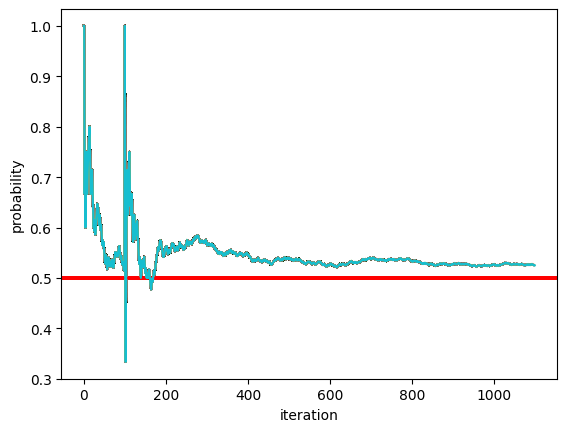

In [17]:
answer = monte_carlo(1000)
print('Final answer', answer)

### Observation
From above example we can see that as the number of iterations increases the ACCURACY of the probability increases. This is how we can use the Monte Carlo Simulation to find probabilities experimentally.

# Why do we peform many iterations for monte carlo?

To under stand this, we will simply plot normal distribution of different size of samples.

In [23]:
from numpy.random import normal
from matplotlib import pyplot

In [24]:
# define the distribution
mu=50
sigma =5

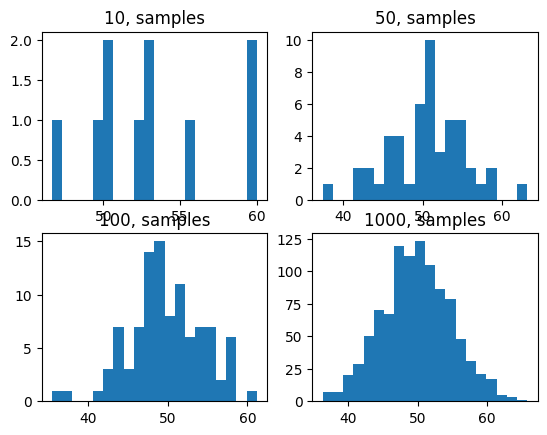

In [25]:
# generate monte carlo samples of differing size
sizes =  [10,50, 100, 1000]
for i in range(len(sizes)):
    # generate sample
    sample =  normal(mu, sigma, sizes[i])
    # plot histogram of sample
    pyplot.subplot(2,2,i +1)
    pyplot.hist(sample, bins=20)
    pyplot.title('%d, samples'%sizes[i])
pyplot.show()

### Observtion:
From the above results we can see that as the sample size increases the accuracy of the results increases.

# How to use monte carlo to predict future stock price of a company?

In [40]:
pip install pandas_datareader


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: C:\Python\python.exe -m pip install --upgrade pip


In [42]:
pip install yfinance


     -------------------------------------- 72.4/72.4 kB 796.9 kB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 2.2 MB/s eta 0:00:00
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
     ---------------------------------------- 2.9/2.9 MB 2.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.0-py3-none-any.whl size=135766 sha256=6765b5abb06afa0a85bd7fc901bf15d47119ca35cb6afceea8e61951bd597fd1
  Stored in directory: c:\users\senthil.marimuthu\appdata\local\pip\cache\wheels\e2\b9\da\716514851b65304b2d24f2a161398b9470da589b08a5a586c8
Successfully built peewee
  Attempting uninstall: requests
    Found existing inst


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: C:\Python\python.exe -m pip install --upgrade pip


In [43]:
from pandas_datareader import data as pdr
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yfin

yfin.pdr_override()
%matplotlib inline

C:\Python\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [46]:
data = pd.DataFrame()
data = pdr.get_data_yahoo('PG', start='2010-1-1')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,61.110001,61.310001,60.630001,61.119999,40.160057,9190800
2010-01-05,61.130001,61.279999,60.599998,61.139999,40.173206,8649400
2010-01-06,60.939999,60.959999,60.500000,60.849998,39.982647,9908400
2010-01-07,60.580002,60.700001,60.240002,60.520000,39.765816,8972800
2010-01-08,60.360001,60.529999,60.060001,60.439999,39.713253,8464600


This data contains the high, low, open, close value of stock , volume and the adj close price. We will use only the closing price of the stock. So lets create new dataframe called new_data to forecast P&G’s future stock price in this exercise.

In [47]:
new_data =  data['Close']
new_data.head()

Date
2010-01-04    61.119999
2010-01-05    61.139999
2010-01-06    60.849998
2010-01-07    60.520000
2010-01-08    60.439999
Name: Close, dtype: float64

<AxesSubplot: xlabel='Date'>

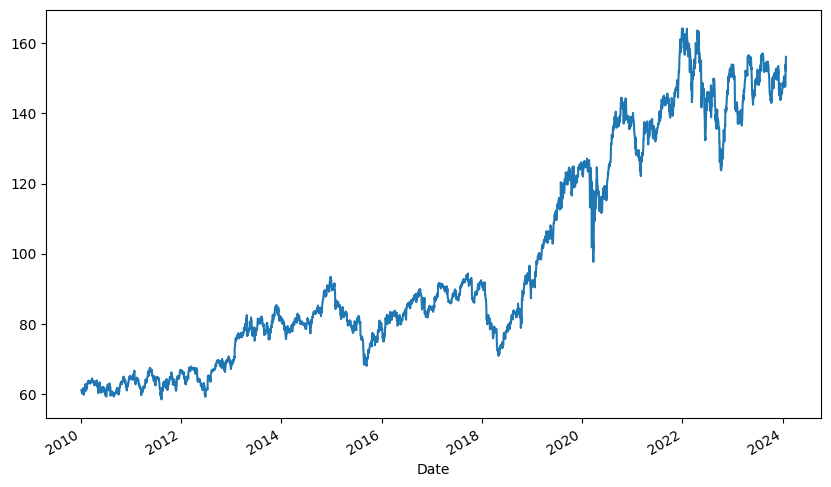

In [48]:
new_data.plot(figsize=(10,6))

Today’s Stock Price = Yesterday’s Stock Price x e^r

where r = periodic daily return

Monte carlo simulation generates theoretical future ‘r’ values because the rate of return on an asset is a random number. To model the movement and determine possible future ‘r’ values we must use a formula that models random movements. Here we will use a formula of Brownian motion.

Brownian motion assumes that there are two parts to the random movement. The first is the overall driving force called as ‘drift’ and the second is the random component. Therefore the rate that the asset changes in value each day- the ‘r’ value that the e is raised to can be broken down into two parts-an overall drift and a random stochastic component.

Amount change in stock Price = Fixed drift rate + Random stochastic variable

To create a monte carlo simulator to model future outcomes we need to find theses two parts- the drift and the random stochastic component.

The first thing we’ll do is estimate its historical log returns.

In [55]:
log_returns = np.log(1+new_data.pct_change())
log_returns.head()

Date
2010-01-04         NaN
2010-01-05    0.000327
2010-01-06   -0.004755
2010-01-07   -0.005438
2010-01-08   -0.001323
Name: Close, dtype: float64

where

In [52]:
new_data.pct_change()

Date
2010-01-04         NaN
2010-01-05    0.000327
2010-01-06   -0.004743
2010-01-07   -0.005423
2010-01-08   -0.001322
                ...   
2024-01-22    0.001965
2024-01-23    0.041390
2024-01-24   -0.012079
2024-01-25    0.023008
2024-01-26    0.003342
Name: Close, Length: 3540, dtype: float64

Plotting historic log returns

<AxesSubplot: xlabel='Date'>

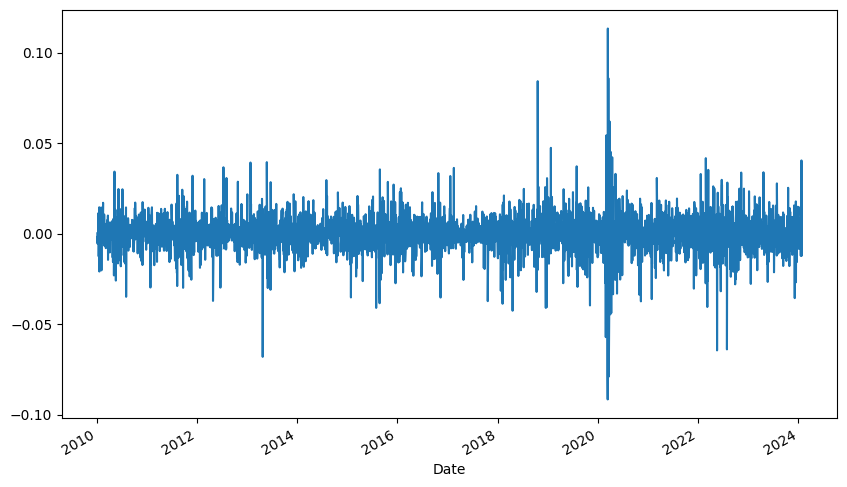

In [57]:
log_returns.plot(figsize=(10,6))

The first part — Drift is expected periodic daily rate of return. The formula we will use here will be-

Drift = Average Daily Return− (Variance​/2)

Calculating Drift:

In [59]:
u = log_returns.mean()
u

0.0002650222970897396

In [61]:
var =  log_returns.var()
var

0.00011941455747165988

In [62]:
drift = u-(var *0.5)
drift

0.00020531501835390967

To calculate the second part- create a variable stdev which is a standard deviation of historic log returns

In [63]:
stdev =  log_returns.std()
stdev

0.01092769680544166

The central limit theorem tells us that if we plot enough periodic daily returns of an asset the graph should form a normal distribution, bell shaped graph.

To create get the random stochastic component we will use the norm.ppf formula as follows:

In [64]:
norm.ppf(0.95)

1.6448536269514722

If an event has a 95% chance of occurring, the distance between this event and the mean will be approximately 1.65 standard deviations. we will use the numpy rand function to randomize this component. we want a multidimensional array so we will insert to arguments.

In [67]:
x =  np.random.rand(10,2)
x

array([[0.75005902, 0.68458195],
       [0.62990247, 0.17951605],
       [0.28438756, 0.25817831],
       [0.55832099, 0.16259801],
       [0.47905712, 0.83676597],
       [0.0402071 , 0.56486022],
       [0.28013394, 0.95417442],
       [0.15044   , 0.14228066],
       [0.22726401, 0.17885367],
       [0.26962024, 0.15444287]])

We will include this random element within the “PPF” distribution to obtain the distance from the mean corresponding to each of these randomly generated probabilities.

In [68]:
z = norm.ppf(np.random.rand(10,2))
z

array([[ 0.28276071,  0.1111717 ],
       [-0.49353717, -0.21280956],
       [-0.29659161, -1.03899973],
       [ 0.75833738,  1.99263721],
       [-0.91562028, -0.30213307],
       [-1.32446707, -0.79484141],
       [-0.51949423, -0.18095568],
       [-0.18405608, -1.21953155],
       [-1.51403777, -1.20483138],
       [ 0.55825847,  0.25868494]])

Now we have understood how to create a random component. lets put it in to formula. If we want stock price predictions of next 1000 days with 20 iterations, we will define variables as follows:

In [70]:
t_intervals = 100
iterations = 10

In [72]:
daily_returns =  np.exp(np.array(drift) + np.array(stdev) * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.02296443, 0.99582804, 1.01248946, 0.98801198, 1.0070538 ,
        0.99887884, 0.9987182 , 0.9961593 , 1.00012217, 1.02637677],
       [1.01618538, 1.00137869, 0.99146246, 1.01313673, 0.9976174 ,
        1.0293411 , 1.00182745, 1.01088822, 1.00823016, 0.97928661],
       [0.99272241, 1.00051232, 1.01518863, 1.00991412, 1.02521832,
        0.99970858, 0.99920711, 1.00681721, 0.99848061, 0.9830986 ],
       [0.99694634, 1.00668898, 0.98735648, 0.99026509, 0.98765776,
        1.01490384, 1.0001005 , 0.99371748, 1.00408697, 0.99399492],
       [0.99706481, 1.00391114, 1.00261358, 0.9960053 , 0.9884473 ,
        0.99557605, 0.98839102, 0.99779283, 0.99119089, 0.99730347],
       [1.01447606, 1.00711007, 1.01057121, 1.010532  , 0.99238658,
        1.00308951, 1.00091511, 1.00107147, 0.99482035, 1.01554337],
       [1.00213794, 1.00175751, 1.01112577, 1.01069983, 1.00390948,
        1.00605544, 1.01003351, 0.98333163, 0.98381766, 0.9930665 ],
       [1.0132742 , 0.98762622, 0.9766069

As we have got the daily return values we can calculate the future stock price by this formula:
S1 = S0 x daily return

here S0= stock price at t day

S1 = stock price at t+1 day

We will create an 100 by 10 array with all zero values, then replace the first row with the last stock price as follows:

In [74]:
s0= new_data.iloc[-1]
s0

156.13999938964844

In [75]:
price_list =  np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [76]:
price_list[0] =  s0
price_list

array([[156.13999939, 156.13999939, 156.13999939, 156.13999939,
        156.13999939, 156.13999939, 156.13999939, 156.13999939,
        156.13999939, 156.13999939],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  

In [77]:
for t in range(1, t_intervals):
    price_list[t] =  price_list[t-1] * daily_returns[t]
price_list

array([[156.13999939, 156.13999939, 156.13999939, 156.13999939,
        156.13999939, 156.13999939, 156.13999939, 156.13999939,
        156.13999939, 156.13999939],
       [158.66718416, 156.35526853, 154.80694792, 158.19116865,
        155.76798025, 160.72131835, 156.42533813, 157.84008642,
        157.42505689, 152.90581081],
       [157.51246938, 156.43537297, 157.15825312, 159.75949443,
        159.6961872 , 160.67448092, 156.30131059, 158.91611469,
        157.18586684, 150.32148897],
       [157.03147991, 157.48176536, 155.17121971, 158.20425052,
        157.72517793, 163.06914714, 156.31701943, 157.9177203 ,
        157.82828003, 149.41879575],
       [156.5705629 , 158.09769796, 155.57677246, 157.57227149,
        155.90302591, 162.34773797, 154.50233793, 157.56916923,
        156.43795359, 149.01588336],
       [158.83708802, 159.2217837 , 157.22140783, 159.2318222 ,
        154.71607007, 162.84931245, 154.64372434, 157.73799987,
        155.62765938, 151.33209217],
       [15

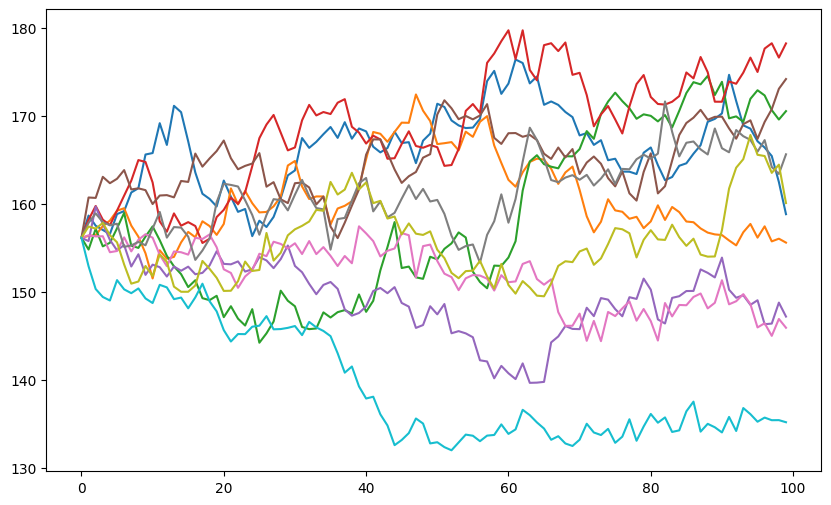

In [79]:
plt.figure(figsize=(10,6))
plt.plot(price_list)

From the line plots above, we can see the simulated stock prices can spread from about $130 to $180. This has given us an idea about the potential price range for the stock based on the same level of volatility. We will do further analysis on our simulated stock prices to gain more insights.

lets calculate the Mean of the simulated last prices, Quantile (5%) and Quantile (95%) of the simulated last prices.

In [83]:
print('Expected price', round(np.mean(price_list), 2))
print('Quantile (5%)', np.percentile(price_list, 5))
print('Quantile (95%)', np.percentile(price_list, 95))

Expected price 157.67
Quantile (5%) 135.97775587161442
Quantile (95%) 172.32166003235693


From the result above, we can see there is a 5% of probability that the stock price will be below $135.97775587161442 and a 5% of probability the price will be above $172.32. Our expected stock price at the year-end is $157.67.

This is how mante carlo is useful to build model using stochastic data than actual data.